# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')      #ok for litteral labels
print (xs[['d', 'f', 'h']], '\n')      #Accessing multiple lines (making a subseries)
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.059291
b    0.227559
c    0.914934
d    1.163684
e    0.053529
dtype: float64
a         NaN
b    0.455118
c    1.829868
d    2.327367
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-10
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-11-9':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00     9.439658
2020-09-12 14:45:00    10.758873
2020-09-13 14:45:00    10.020116
2020-09-14 14:45:00     9.663287
Freq: D, dtype: float64 

Series([], Freq: D, dtype: float64) 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df      # better formatting than just "print(df)"


,A,B,C,D
2020-11-09 14:45:00,-0.607831,0.667072,-0.530590,0.108355
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,0.713991
2020-11-09 16:45:00,0.536037,0.193436,1.710728,-1.476631
2020-11-09 17:45:00,0.618993,0.460419,0.936959,-0.214160
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,-0.630658
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,-0.986307
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,0.387206
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,-0.132408
2020-11-09 22:45:00,0.872151,1.413284,0.865648,-0.019026
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,-0.144767


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,    #no column dimension needed
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),    #useful for splitting data
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.607831,0.667072,-0.530590,0.108355
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,0.713991
2020-11-09 16:45:00,0.536037,0.193436,1.710728,-1.476631
2020-11-09 17:45:00,0.618993,0.460419,0.936959,-0.214160
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,-0.630658


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,0.387206
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,-0.132408
2020-11-09 22:45:00,0.872151,1.413284,0.865648,-0.019026
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,-0.144767


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.6078308 ,  0.66707185, -0.53059044,  0.10835548],
       [-0.58337969,  0.42226697, -0.14194272,  0.7139908 ],
       [ 0.5360368 ,  0.19343622,  1.71072789, -1.47663128],
       [ 0.61899338,  0.46041859,  0.93695942, -0.21415964],
       [-0.87819305, -1.17889452,  0.79606178, -0.63065764],
       [-0.65703219,  0.9595441 ,  0.29055325, -0.98630735],
       [ 0.55842049,  0.77123494, -0.3118515 ,  0.38720589],
       [ 1.60221481, -0.63837477,  0.53484537, -0.13240796],
       [ 0.87215142,  1.41328391,  0.86564789, -0.01902588],
       [ 0.45404678, -0.21505153,  0.15448035, -0.14476676]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.191543,0.285494,0.430489,-0.239440
std,0.820707,0.775607,0.677217,0.644103
min,-0.878193,-1.178895,-0.530590,-1.476631
25%,-0.601718,-0.112930,-0.067837,-0.526533
50%,0.495042,0.441343,0.412699,-0.138587
75%,0.603850,0.745194,0.848251,0.076510
max,1.602215,1.413284,1.710728,0.713991


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.607831,-0.583380,0.536037,0.618993,-0.878193,-0.657032,0.558420,1.602215,0.872151,0.454047
B,0.667072,0.422267,0.193436,0.460419,-1.178895,0.959544,0.771235,-0.638375,1.413284,-0.215052
C,-0.530590,-0.141943,1.710728,0.936959,0.796062,0.290553,-0.311852,0.534845,0.865648,0.154480
D,0.108355,0.713991,-1.476631,-0.214160,-0.630658,-0.986307,0.387206,-0.132408,-0.019026,-0.144767


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.108355,-0.530590,0.667072,-0.607831
2020-11-09 15:45:00,0.713991,-0.141943,0.422267,-0.583380
2020-11-09 16:45:00,-1.476631,1.710728,0.193436,0.536037
2020-11-09 17:45:00,-0.214160,0.936959,0.460419,0.618993
2020-11-09 18:45:00,-0.630658,0.796062,-1.178895,-0.878193
2020-11-09 19:45:00,-0.986307,0.290553,0.959544,-0.657032
2020-11-09 20:45:00,0.387206,-0.311852,0.771235,0.558420
2020-11-09 21:45:00,-0.132408,0.534845,-0.638375,1.602215
2020-11-09 22:45:00,-0.019026,0.865648,1.413284,0.872151
2020-11-09 23:45:00,-0.144767,0.154480,-0.215052,0.454047


In [20]:
df.sort_values(by="C")  #?

,A,B,C,D
2020-11-09 14:45:00,-0.607831,0.667072,-0.530590,0.108355
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,0.387206
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,0.713991
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,-0.144767
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,-0.986307
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,-0.132408
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,-0.630658
2020-11-09 22:45:00,0.872151,1.413284,0.865648,-0.019026
2020-11-09 17:45:00,0.618993,0.460419,0.936959,-0.214160
2020-11-09 16:45:00,0.536037,0.193436,1.710728,-1.476631


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00   -0.607831
2020-11-09 15:45:00   -0.583380
2020-11-09 16:45:00    0.536037
2020-11-09 17:45:00    0.618993
2020-11-09 18:45:00   -0.878193
2020-11-09 19:45:00   -0.657032
2020-11-09 20:45:00    0.558420
2020-11-09 21:45:00    1.602215
2020-11-09 22:45:00    0.872151
2020-11-09 23:45:00    0.454047
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00   -0.607831
2020-11-09 15:45:00   -0.583380
2020-11-09 16:45:00    0.536037
2020-11-09 17:45:00    0.618993
2020-11-09 18:45:00   -0.878193
2020-11-09 19:45:00   -0.657032
2020-11-09 20:45:00    0.558420
2020-11-09 21:45:00    1.602215
2020-11-09 22:45:00    0.872151
2020-11-09 23:45:00    0.454047
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"]) #notice: inclusive end

                            A         B         C         D
2020-11-09 14:45:00 -0.607831  0.667072 -0.530590  0.108355
2020-11-09 15:45:00 -0.583380  0.422267 -0.141943  0.713991
2020-11-09 16:45:00  0.536037  0.193436  1.710728 -1.476631
                            A         B         C         D
2020-11-09 14:45:00 -0.607831  0.667072 -0.530590  0.108355
2020-11-09 15:45:00 -0.583380  0.422267 -0.141943  0.713991
2020-11-09 16:45:00  0.536037  0.193436  1.710728 -1.476631


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label (squared parentheses)
df.loc[dates[0]]

A   -0.607831
B    0.667072
C   -0.530590
D    0.108355
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,-0.607831,0.667072
2020-11-09 15:45:00,-0.583380,0.422267
2020-11-09 16:45:00,0.536037,0.193436
2020-11-09 17:45:00,0.618993,0.460419
2020-11-09 18:45:00,-0.878193,-1.178895
2020-11-09 19:45:00,-0.657032,0.959544
2020-11-09 20:45:00,0.558420,0.771235
2020-11-09 21:45:00,1.602215,-0.638375
2020-11-09 22:45:00,0.872151,1.413284
2020-11-09 23:45:00,0.454047,-0.215052


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.878193,-1.178895
2020-11-09 19:45:00,-0.657032,0.959544
2020-11-09 20:45:00,0.558420,0.771235


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])   #for a specific position in the table

-0.5833796918129466
-0.5833796918129466


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.618993
B    0.460419
C    0.936959
D   -0.214160
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.618993  0.460419
2020-11-09 18:45:00 -0.878193 -1.178895


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,-0.583380,-0.141943
2020-11-09 16:45:00,0.536037,1.710728
2020-11-09 18:45:00,-0.878193,0.796062


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00 -0.583380  0.422267 -0.141943  0.713991
2020-11-09 16:45:00  0.536037  0.193436  1.710728 -1.476631 

                            B         C
2020-11-09 14:45:00  0.667072 -0.530590
2020-11-09 15:45:00  0.422267 -0.141943
2020-11-09 16:45:00  0.193436  1.710728
2020-11-09 17:45:00  0.460419  0.936959
2020-11-09 18:45:00 -1.178895  0.796062
2020-11-09 19:45:00  0.959544  0.290553
2020-11-09 20:45:00  0.771235 -0.311852
2020-11-09 21:45:00 -0.638375  0.534845
2020-11-09 22:45:00  1.413284  0.865648
2020-11-09 23:45:00 -0.215052  0.154480


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.4222669747246002

**NOTICE**: log returns a copy, ilog returns a view

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column (useful for physical applic.)
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.607831,0.667072,-0.530590,0.108355
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,0.713991
2020-11-09 16:45:00,0.536037,0.193436,1.710728,-1.476631
2020-11-09 17:45:00,0.618993,0.460419,0.936959,-0.214160
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,-0.986307
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,0.387206
2020-11-09 22:45:00,0.872151,1.413284,0.865648,-0.019026


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,0.667072,NaN,0.108355
2020-11-09 15:45:00,NaN,0.422267,NaN,0.713991
2020-11-09 16:45:00,0.536037,0.193436,1.710728,NaN
2020-11-09 17:45:00,0.618993,0.460419,0.936959,NaN
2020-11-09 18:45:00,NaN,NaN,0.796062,NaN
2020-11-09 19:45:00,NaN,0.959544,0.290553,NaN
2020-11-09 20:45:00,0.558420,0.771235,NaN,0.387206
2020-11-09 21:45:00,1.602215,NaN,0.534845,NaN
2020-11-09 22:45:00,0.872151,1.413284,0.865648,NaN
2020-11-09 23:45:00,0.454047,NaN,0.154480,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,5,0.5,2,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,5,2.5,10,0.999048
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,5,3.0,12,0.998630
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,5,3.5,14,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16,0.997564
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.667072,-0.530590,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.583380,-0.422267,-0.141943,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.536037,-0.193436,-1.710728,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.618993,-0.460419,-0.936959,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.878193,-1.178895,-0.796062,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.657032,-0.959544,-0.290553,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.558420,-0.771235,-0.311852,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-1.602215,-0.638375,-0.534845,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.872151,-1.413284,-0.865648,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.454047,-0.215052,-0.154480,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```
notice it doesn't affect the original df (it's a copy..)

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,1.000000
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,5,0.5,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,0.999657
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,5,2.0,0.999391
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,5,2.5,0.999048
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,5,3.0,0.998630
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,5,3.5,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,0.997564
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,5,2.5,10,0.999048
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,5,3.0,12,0.998630
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,5,3.5,14,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16,0.997564
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,5,0.5,2,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,5,2.5,10,0.999048
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,5,3.0,12,0.998630
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,5,3.5,14,0.998135
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.667072,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,0.422267,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,NaN,0.796062,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,0.959544,0.290553,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.558420,0.771235,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.602215,NaN,0.534845,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.454047,NaN,0.154480,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6.0,0.999657
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16.0,0.997564


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,True,False,True,False,False,False,False
2020-11-09 16:45:00,False,False,False,False,False,False,False
2020-11-09 17:45:00,False,False,False,False,False,False,False
2020-11-09 18:45:00,True,True,False,False,False,False,False
2020-11-09 19:45:00,True,False,False,False,False,False,False
2020-11-09 20:45:00,False,False,True,False,False,False,False
2020-11-09 21:45:00,False,True,False,False,False,False,False
2020-11-09 22:45:00,False,False,False,False,False,False,False
2020-11-09 23:45:00,False,True,False,False,False,False,False


In [42]:
# filling missing data (dangerous)
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.000000,0.422267,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.000000,0.796062,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.959544,0.290553,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.558420,0.771235,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.602215,0.000000,0.534845,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.454047,0.000000,0.154480,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')    #guess by fitting (dangerous)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.667072,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,0.422267,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.618993,0.460419,0.796062,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.618993,0.959544,0.290553,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.558420,0.771235,0.290553,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.602215,0.771235,0.534845,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.454047,1.413284,0.154480,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.252326
B          0.285494
C          0.430489
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.876640
2020-11-09 15:45:00    1.170987
2020-11-09 16:45:00    1.920007
2020-11-09 17:45:00    2.216576
2020-11-09 18:45:00    2.105481
2020-11-09 19:45:00    2.727445
2020-11-09 20:45:00    3.145205
2020-11-09 21:45:00    3.570974
2020-11-09 22:45:00    4.164092
2020-11-09 23:45:00    4.127199
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)   #example: sum over column

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.583380,1.089339,-0.672533,10,0.5,2,1.999962
2020-11-09 16:45:00,-0.047343,1.282775,1.038195,15,1.5,6,2.999810
2020-11-09 17:45:00,0.571650,1.743194,1.975154,20,3.0,12,3.999467
2020-11-09 18:45:00,-0.306543,0.564299,2.771216,25,5.0,20,4.998858
2020-11-09 19:45:00,-0.963575,1.523843,3.061769,30,7.5,30,5.997906
2020-11-09 20:45:00,-0.405154,2.295078,2.749918,35,10.5,42,6.996536
2020-11-09 21:45:00,1.197061,1.656703,3.284763,40,14.0,56,7.994670
2020-11-09 22:45:00,2.069212,3.069987,4.150411,45,18.0,72,8.992234
2020-11-09 23:45:00,2.523259,2.854936,4.304891,50,22.5,90,9.989152


In [46]:
df    #(not affected: just a copy before)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.667072,-0.530590,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.583380,0.422267,-0.141943,5,0.5,2,0.999962
2020-11-09 16:45:00,0.536037,0.193436,1.710728,5,1.0,4,0.999848
2020-11-09 17:45:00,0.618993,0.460419,0.936959,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.878193,-1.178895,0.796062,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.657032,0.959544,0.290553,5,2.5,10,0.999048
2020-11-09 20:45:00,0.558420,0.771235,-0.311852,5,3.0,12,0.998630
2020-11-09 21:45:00,1.602215,-0.638375,0.534845,5,3.5,14,0.998135
2020-11-09 22:45:00,0.872151,1.413284,0.865648,5,4.0,16,0.997564
2020-11-09 23:45:00,0.454047,-0.215052,0.154480,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())     #can be done for column only: default

A           2.480408
B           2.592178
C           2.241318
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays (elementwise)
df['A']+df['B']

2020-11-09 14:45:00    0.667072
2020-11-09 15:45:00   -0.161113
2020-11-09 16:45:00    0.729473
2020-11-09 17:45:00    1.079412
2020-11-09 18:45:00   -2.057088
2020-11-09 19:45:00    0.302512
2020-11-09 20:45:00    1.329655
2020-11-09 21:45:00    0.963840
2020-11-09 22:45:00    2.285435
2020-11-09 23:45:00    0.238995
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

--2020-11-10 14:46:30--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.67.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2020-11-10 14:46:31--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucabf383b233f79ae4aeff96545e.dl.dropboxusercontent.com/cd/0/inline/BC4MsgBl79WnE_Jgo_EwBiB4Iozlug9TG2T4SZUQZNx1uZzcVEg_gC7zlRPyVaXz0vsQHDS0yLYUhToX-g8-SG0CsbyYeU0lpTmoXwUQVFCbqT0vND5eqttL0enWAJ9yN3Q/file# [segue]
--2020-11-10 14:46:31--  https://ucabf383b233f79ae4aeff96545e.dl.dropboxusercontent.com/cd/0/inline/BC4MsgBl79WnE_Jgo_EwBiB4Iozlug9TG2T4SZUQZNx1uZzcVEg_gC7zlRPyVaXz0vsQHDS0yLYUhToX-g8-SG0CsbyYeU0lpTmoXwUQ

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [65]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25   #almost instant

In [66]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [69]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.121307,0.640290,-1.825207,1.090826
1,0.148201,-2.696871,0.548942,0.705912
2,-1.173348,0.409457,0.953853,-0.782877
3,0.551093,1.003618,-0.691766,0.876946
4,-0.571277,-0.624240,2.206273,-0.274309
5,0.686113,0.073329,-1.276703,0.241940
6,0.792321,-2.771288,-0.000356,0.173651
7,1.140813,1.211602,0.509926,0.102091
8,-0.555852,-1.249418,-0.769954,-1.204277
9,-0.780326,-1.403106,0.705215,0.913777


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.080076 -0.593493  0.488598  1.640556
 1  0.784093 -0.216946 -1.343377 -0.351891
 2  1.237695 -0.142154  0.088319 -0.279505,
           0         1         2         3
 3 -0.543244  1.393916 -1.084600 -1.060405
 4 -0.331591 -0.955555 -0.512516 -0.029033
 5 -0.961821 -1.531514  0.067322  0.156330
 6  0.455499 -0.024192  0.212108 -1.308513,
           0         1         2         3
 7  0.672046  1.203132 -0.627442  0.719921
 8 -0.826518  0.102472  0.243766  0.600446
 9  1.088922 -1.272115 -0.508424 -0.970069]

In [54]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.080076,-0.593493,0.488598,1.640556
1,0.784093,-0.216946,-1.343377,-0.351891
2,1.237695,-0.142154,0.088319,-0.279505
3,-0.543244,1.393916,-1.084600,-1.060405
4,-0.331591,-0.955555,-0.512516,-0.029033
5,-0.961821,-1.531514,0.067322,0.156330
6,0.455499,-0.024192,0.212108,-1.308513
7,0.672046,1.203132,-0.627442,0.719921
8,-0.826518,0.102472,0.243766,0.600446
9,1.088922,-1.272115,-0.508424,-0.970069


In [55]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.080076,-0.593493,0.488598,1.640556
1,0.784093,-0.216946,-1.343377,-0.351891
2,1.237695,-0.142154,0.088319,-0.279505
3,-0.543244,1.393916,-1.084600,-1.060405
4,-0.331591,-0.955555,-0.512516,-0.029033
5,-0.961821,-1.531514,0.067322,0.156330
6,0.455499,-0.024192,0.212108,-1.308513
7,0.672046,1.203132,-0.627442,0.719921
8,-0.826518,0.102472,0.243766,0.600446
9,1.088922,-1.272115,-0.508424,-0.970069


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.178193,-0.873600
1,bar,one,1.731124,0.859289
2,foo,two,0.330519,0.758887
3,bar,three,1.087896,0.219051
4,foo,two,-1.026639,0.506506
5,bar,two,-0.569463,2.131755
6,foo,one,0.546474,0.270242
7,foo,three,0.394485,-0.593102


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,2.249557,3.210095
foo,0.423031,0.068933


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.654397
       two       0.515971
baz    one      -1.266099
       two      -1.734015
foo    one      -0.207233
       two       0.812710
qux    one      -0.005212
       two      -0.350933
dtype: float64


In [60]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.731124  0.859289
    three  1.087896  0.219051
    two   -0.569463  2.131755
foo one    0.724666 -0.603358
    three  0.394485 -0.593102
    two   -0.696120  1.265393

In [61]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.731124
            D    0.859289
     three  C    1.087896
            D    0.219051
     two    C   -0.569463
            D    2.131755
foo  one    C    0.724666
            D   -0.603358
     three  C    0.394485
            D   -0.593102
     two    C   -0.696120
            D    1.265393
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

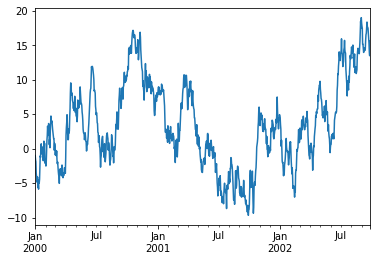

In [70]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

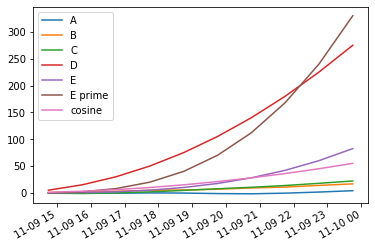

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')